In [1]:
import os
import numpy as np
from base import *

In [2]:
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\human pancreas ready to train\test model'
pthim = os.path.join(pth, '5x')
umpix = 2
pthtest = os.path.join(pth, 'test images')
pthtestim = os.path.join(pthtest, '5x')
nm = 'ANACODA_09_04_2024'

WS = [[2, 0, 0, 1, 0, 0, 2, 0, 0, 2], [7, 6], 
      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
      [6, 5, 4, 1, 2, 3, 8, 10, 9, 7], [9]]
numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[121, 248, 252],
                  [0, 0, 255],
                  [80, 237, 80],
                  [255, 255, 0],
                  [149, 35, 245],
                  [255, 194, 245],
                  [255, 255, 255],
                  [255, 0, 0],
                  [64, 128, 128],
                  [73, 120, 111]])
classNames = ['islet', 'duct', 'blood vessel', 'fat','acini','ecm','whitespace','PanIN', 'PDAC','nerve']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
numims = 2

Saving model metadata and classification colormap...
Net file already exists, updating data...


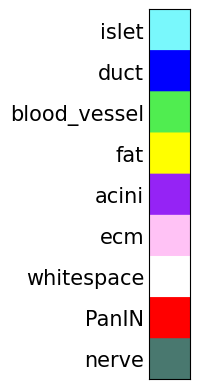

In [3]:
save_model_metadata(pthDL, pthim, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate)

In [4]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
 
 Loading PNG images...
1 / 1 processing: 6520-197 HE
Error processing 6520-197 HE: Unsupported or missing image file
Image 1 of 5: 6520-197 HE
 annotation data previously loaded
Image 2 of 5: S08-07401 1K
 annotation data previously loaded
Image 3 of 5: S12-62356 1P1
 annotation data previously loaded
Image 4 of 5: S14-03572 1E
 annotation data previously loaded
Image 5 of 5: S14-19326 1FSCK
 annotation data previously loaded


In [5]:
create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 83475400.0 pixels of islet, 62% of the most common class.
 There are 13532900.0 pixels of duct, 10% of the most common class.
 There are 55550100.0 pixels of blood vessel, 41% of the most common class.
 There are 117245800.0 pixels of fat, 87% of the most common class.
 There are 70479100.0 pixels of acini, 52% of the most common class.
 There are 133900000.0 pixels of ecm. This is the most common class.
 There are 127966300.0 pixels of whitespace, 95% of the most common class.
 There are 8878500.0 pixels of PanIN, 6% of the most common class.
 There are 30493300.0 pixels of nerve, 22% of the most common class.

Building training tiles...
Starting time for the while loop
Total time elapsed for the while loop: 1677.4344935417175
Saving big tiles
  1 of 15 training images completed in 28 minutes
  Used 827.8% counts and 100.0% unique annotations of islet
  Used 4634.0% counts and 100.0% unique annotations of duct
 

KeyboardInterrupt: 

In [ ]:
train_segmentation_model(pthDL, fine_tune=False)

In [ ]:
test_segmentation_model(pthDL, pthtest, pthtestim)

In [ ]:
classify_images(pthim,pthDL)

In [ ]:
quantify_images(pthim,pthDL)